In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filename = 'filter_hangzhou_info.csv'
df = pd.read_csv(filename)
df.head()

,community_name,tags,price_det,price_unit,house_type,area,year,region,sub_region,stree,floor_heigh,floor_num
0,商贸公寓,NaN,45,10000,'1室1厅',45,2018,萧山,瓜沥,商贸街188号,中层,27
1,商贸公寓,NaN,45,12500,'1室1厅',36,1984,萧山,瓜沥,商贸街188号,高层,6
2,商贸公寓,"'近地铁', '配套成熟', '环境优美'",50,10000,'1室2厅',50,2016,萧山,瓜沥,商贸街188号,中层,17
3,商贸公寓,NaN,50,10000,'1室1厅',50,1996,萧山,瓜沥,商贸街188号,中层,6
4,商贸公寓,NaN,45,12500,'1室1厅',36,1991,萧山,瓜沥,商贸街188号,高层,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863747 entries, 0 to 863746
Data columns (total 12 columns):
community_name    863747 non-null object
tags              626600 non-null object
price_det         863747 non-null int64
price_unit        863747 non-null int64
house_type        863747 non-null object
area              863747 non-null int64
year              863747 non-null int64
region            863747 non-null object
sub_region        863747 non-null object
stree             862162 non-null object
floor_heigh       766754 non-null object
floor_num         863747 non-null int64
dtypes: int64(5), object(7)
memory usage: 79.1+ MB


In [4]:
df.describe()

,price_det,price_unit,area,year,floor_num
count,863747.000000,863747.000000,863747.000000,863747.000000,863747.00000
mean,298.632682,28279.823478,102.400918,2009.589563,15.19250
std,367.538979,13502.899671,67.523222,21.184334,9.36471
min,8.000000,1607.000000,10.000000,147.000000,1.00000
25%,150.000000,19411.000000,64.000000,2007.000000,7.00000
50%,229.000000,25925.000000,89.000000,2012.000000,15.00000
75%,340.000000,35133.500000,120.000000,2015.000000,21.00000
max,20000.000000,304114.000000,3870.000000,2021.000000,99.00000


从数值型变量分布来看，year中存在异常值，对其进行处理

In [5]:
df['year'].unique()

array([2018, 1984, 2016, 1996, 1991, 2014, 2017, 2015, 2009, 2013, 1988,
       1992, 2011, 1983, 2012, 2010, 2000, 1990, 1993, 2007, 2008, 1995,
       2001, 1999, 1994, 1997, 1998, 1989, 1985, 2005, 1986, 2006, 2004,
       2003, 1902, 1903, 1900, 2002, 1904, 2019, 1905, 2020, 1930,  147,
       1987, 1950, 1948, 1980, 1981, 1982, 1960, 1979, 1978, 1977, 1970,
       1955, 1912, 1971, 1976, 1974, 1972, 1975, 1968, 1925, 2021, 1967,
       1965, 1944, 1916], dtype=int64)

In [6]:
years = list(df['year'].unique())
years.sort()
years

[147,
 1900,
 1902,
 1903,
 1904,
 1905,
 1912,
 1916,
 1925,
 1930,
 1944,
 1948,
 1950,
 1955,
 1960,
 1965,
 1967,
 1968,
 1970,
 1971,
 1972,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [7]:
# 对异常值进行数量进行统计
len(df.loc[((df['year']>2018)) | ((df['year']<1900))])

277

异常值相对偏少，直接删除异常值

In [8]:
# 删除年份异常值
df = df.loc[((df['year']<2019)) & ((df['year']>1899))]

Text(0.5,1,'房源年份分布')

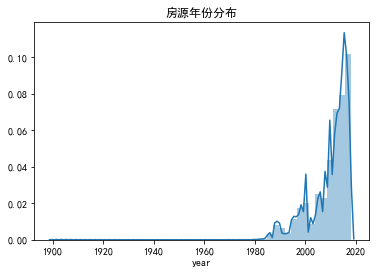

In [9]:
# 直方图显示年份分布
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
sns.distplot(df.year)
plt.title('房源年份分布')

Text(0.5,1,'1980年后的房源年份分布')

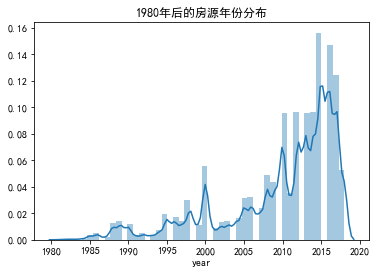

In [10]:
sns.distplot(df[df['year'] > 1980].year)
plt.title('1980年后的房源年份分布')

从总体来说，年份在2000, 和2010年的房源偏多

Text(0.5,1,'2000年后的房源年份分布')

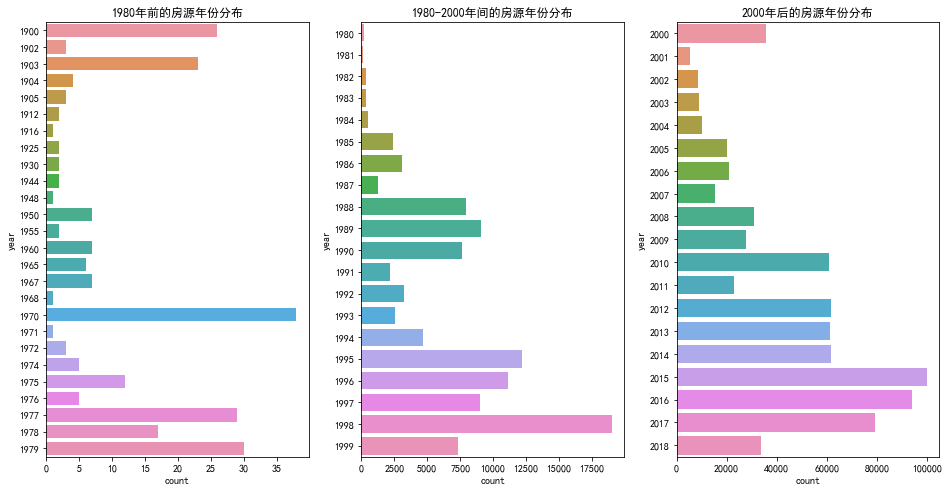

In [11]:
# 绘制各年份的柱状图，<1980, [1980, 2000], [2000, 2018]
f, ax = plt.subplots(1, 3, figsize=(16, 8))
sns.countplot(y='year', data=df[df.year < 1980], ax=ax[0])
ax[0].set_title('1980年前的房源年份分布')
sns.countplot(y='year', data=df[(df.year >= 1980) & (df.year < 2000)], ax=ax[1])
ax[1].set_title('1980-2000年间的房源年份分布')
sns.countplot(y='year', data=df[df.year >= 2000], ax=ax[2])
ax[2].set_title('2000年后的房源年份分布')

Text(0.5,1,'杭州各区发布二手房源总量分布')

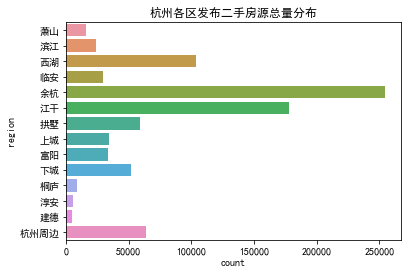

In [67]:
# 绘制地区分布
# 一级地区分布
sns.countplot(y='region', data=df)
plt.title('杭州各区发布二手房源总量分布')

总的来说，房源主要分布在：余杭区、江干区、西湖区；其次在 拱墅区、下城区、杭州周边

In [13]:
# 二级地区房源分布
region_name = list(df['region'].unique())
single_sub = ['临安', '桐庐', '淳安', '建德']
multi_sub = [i for i in region_name if i not in single_sub]
multi_sub

['萧山', '滨江', '西湖', '余杭', '江干', '拱墅', '上城', '富阳', '下城', '杭州周边']

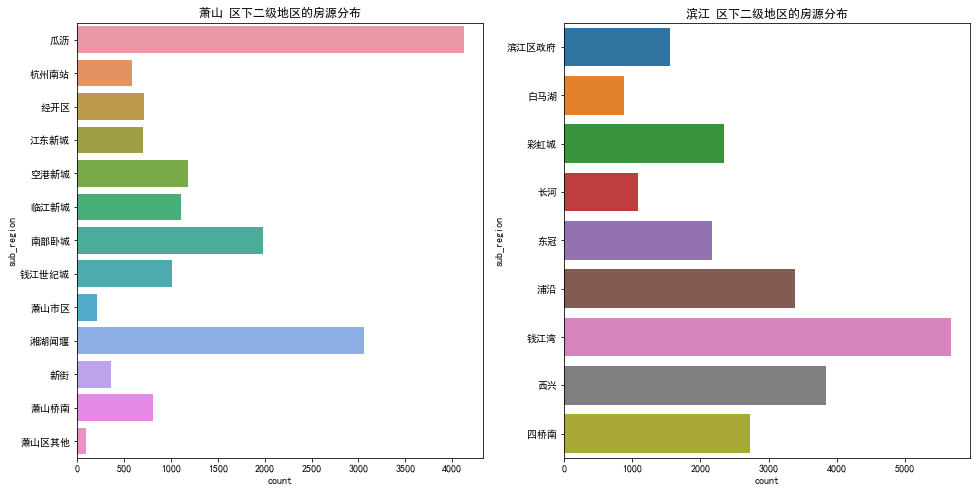

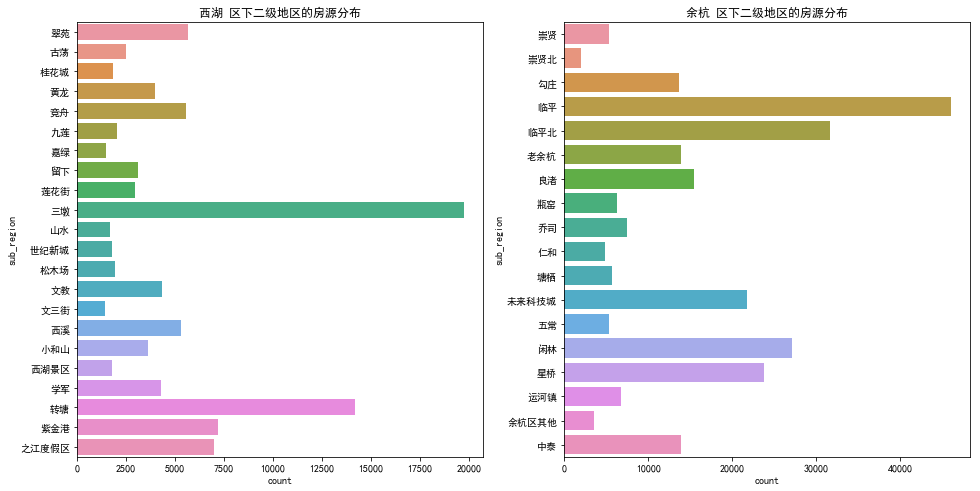

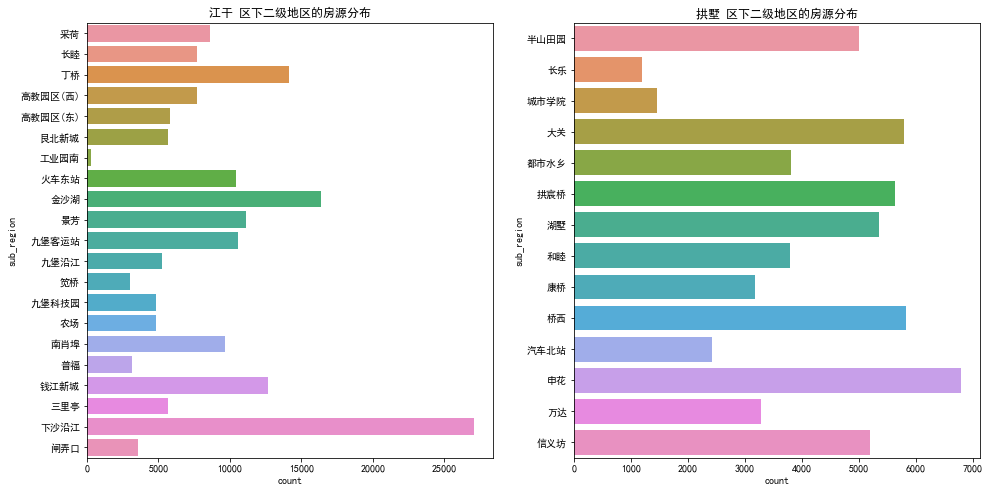

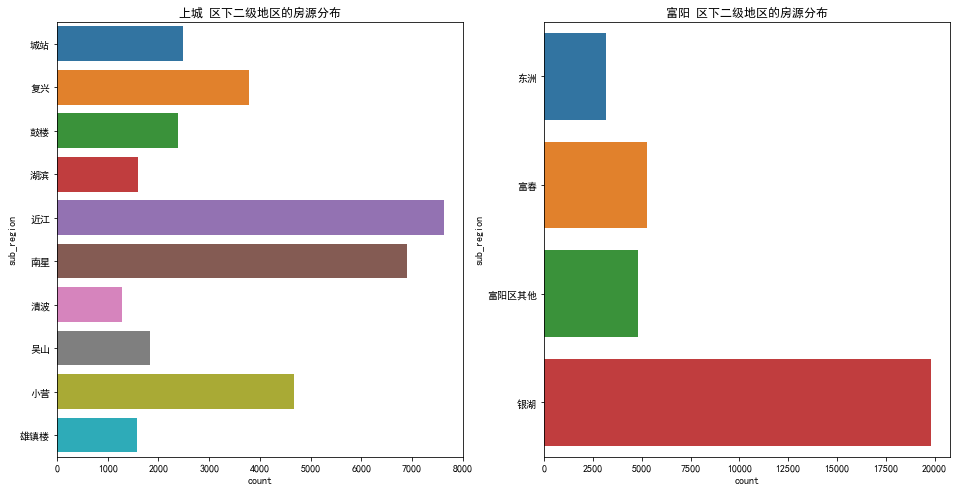

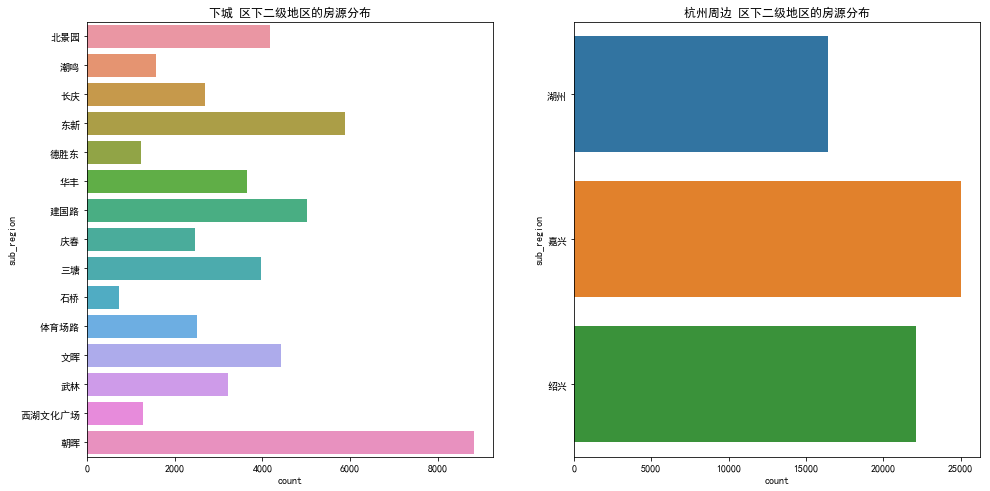

In [14]:
for i in range(0, len(multi_sub), 2):
    f, ax = plt.subplots(1, 2, figsize=(16, 8))
    sns.countplot(y='sub_region', data=df[df['region']==multi_sub[i]], ax=ax[0])
    ax[0].set_title('%s 区下二级地区的房源分布' % multi_sub[i])
    m = i
    sns.countplot(y='sub_region', data=df[df['region']==multi_sub[m+1]], ax=ax[1])
    ax[1].set_title('%s 区下二级地区的房源分布' % multi_sub[m+1])

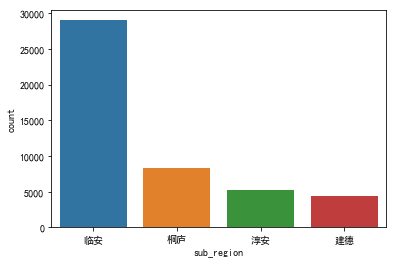

In [15]:
df_sigle_sub = df.loc[df['sub_region'].isin(single_sub)]
sns.countplot('sub_region', data=df_sigle_sub)

In [18]:
# 居室、楼层、面积分布情况  house_type, floor_heigh, area
# area
df.head()

,community_name,tags,price_det,price_unit,house_type,area,year,region,sub_region,stree,floor_heigh,floor_num
0,商贸公寓,NaN,45,10000,'1室1厅',45,2018,萧山,瓜沥,商贸街188号,中层,27
1,商贸公寓,NaN,45,12500,'1室1厅',36,1984,萧山,瓜沥,商贸街188号,高层,6
2,商贸公寓,"'近地铁', '配套成熟', '环境优美'",50,10000,'1室2厅',50,2016,萧山,瓜沥,商贸街188号,中层,17
3,商贸公寓,NaN,50,10000,'1室1厅',50,1996,萧山,瓜沥,商贸街188号,中层,6
4,商贸公寓,NaN,45,12500,'1室1厅',36,1991,萧山,瓜沥,商贸街188号,高层,6


In [22]:
df['floor_heigh'].value_counts()

中层    378117
高层    225723
低层    160908
地下      1771
Name: floor_heigh, dtype: int64

Text(0.5,1,'二手房楼层高度分布')

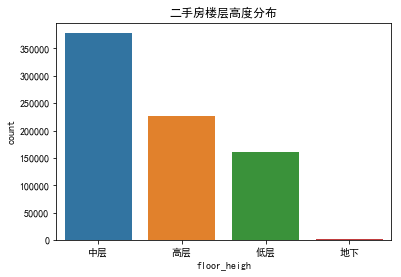

In [51]:
sns.countplot('floor_heigh', data=df)
plt.title('二手房楼层高度分布')

In [24]:
df.describe()

,price_det,price_unit,area,year,floor_num
count,863470.000000,863470.000000,863470.000000,863470.000000,863470.000000
mean,298.648126,28279.430418,102.405007,2009.796769,15.192632
std,367.583770,13501.807613,67.528941,7.689683,9.365011
min,8.000000,1607.000000,10.000000,1900.000000,1.000000
25%,150.000000,19411.000000,64.000000,2007.000000,7.000000
50%,229.000000,25925.000000,89.000000,2012.000000,15.000000
75%,340.000000,35126.000000,120.000000,2015.000000,21.000000
max,20000.000000,304114.000000,3870.000000,2018.000000,99.000000


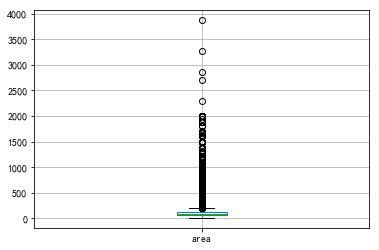

In [26]:
df[['area']].boxplot()
plt.show()

In [31]:
len(df[df['area'] > 300])

18600

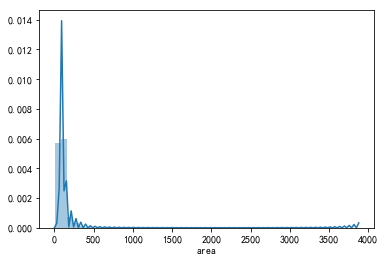

In [32]:
sns.distplot(df.area)

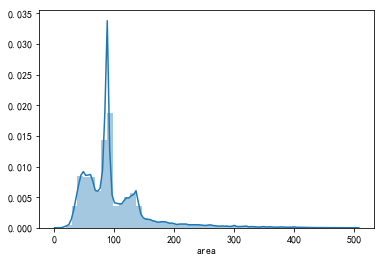

In [23]:
df_ = df[df['area'] < 500]
sns.distplot(df_.area)

面积主要集中在80-90平

In [32]:
# 各区的房龄分布
df['year_code'] = pd.cut(df['year'], [1900, 1980, 2000, 2018], labels=[1, 2, 3])
df.head()
df['year_code'].value_counts()
# pd.crosstab(df.region, df.year, margins=True)

3    723274
2    139748
1       422
Name: year_code, dtype: int64

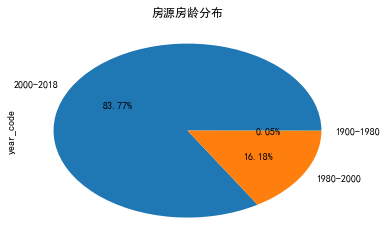

In [68]:
df['year_code'].value_counts().plot.pie(labels=['2000-2018', '1980-2000','1900-1980'],autopct='%1.2f%%')
plt.title('房源房龄分布')
plt.show()

Text(0.5,1,'1980年前房源分布')

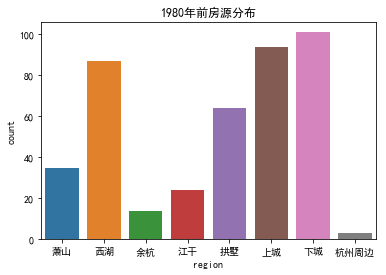

In [41]:
# f, ax = plt.subplots(1, 3, figsize=(16, 8))
sns.countplot('region', data=df[df['year_code']==1])
plt.title('1980年前房源分布')

Text(0.5,1,'1980-2000年间房源分布')

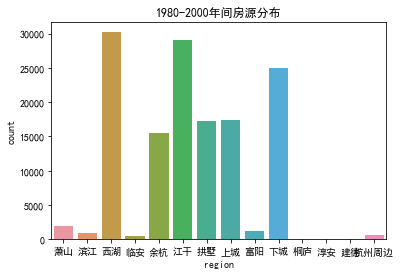

In [42]:
sns.countplot('region', data=df[df['year_code']==2])
plt.title('1980-2000年间房源分布')

Text(0.5,1,'2000年后房源分布')

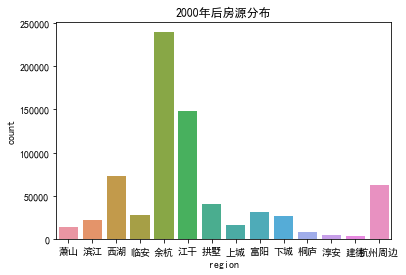

In [43]:
sns.countplot('region', data=df[df['year_code']==3])
plt.title('2000年后房源分布')

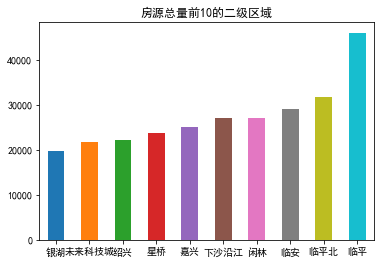

In [66]:
s = df['sub_region'].value_counts()
ten_sub_region = s.sort_values()[-10:]
ten_sub_region.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('房源总量前10的二级区域')
plt.show()